In [178]:
import glob
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.dates as mdates
import seaborn as sns


1) Könntest du, die GLORIA end-use shares, angehängt als csv pro Land-Jahr und
darin dann pro Material-End-Use a) laden und ausspucken als csv pro Land in dem
je Material ein Tab gibt, in dem die end-use-shares pro end-use von 1990-2020 assmbled sind
und für diese b) dann ein skript schreiben, wo man die für selektierte länder über die Zeit
mappen kann? Am besten multiplots mit vielen panels. (siehe end-use paper 2, anhang). Wäre super.

2) Ich würde die GLORIA end-use shares gerne in die plots meines end-use share papers mappen.
Das repo dazu kennst du ja schon. Wir können die dadurch mit Daten aus zwei anderen Datenquellen
vergleichen (für die USA mit nationalen Daten und für 45 andere Länder mit Daten einer anderen globalen
database)

p.s. GLORIA ist eine globale database an 'input-output tabellen', aus denen man die end-use shares berechnen
kann; genauso EXIOBASE.

Ich übermittle dir für die beiden Tasks:

-a die Korrespondenz der GLORIA-EXIOBASE end-uses
-b den link zum end-use-paper repo und den plot grafics (sorry die sind ziemlich
   zusammengeschustert...) - https://github.com/janstre/Material_End_Use_Shares - das graphics skript ist dieses: https://github.com/janstre/Material_End_Use_Shares/blob/main/EndUseShares_Graphs_Outputs_v1.py
-c das end-use paper 2 zur inspiration, wie die plots aussehen könnten. die letzte figure recht
weit unten könnte man für das 1) oben nehmen - also so in der art (alle end-uses + jahre in einem
plot pro land)
-d die end-use share daten von GLORIA

In [93]:
def create_two_way_correspondences(correspondences):
    correspondence_gloria = {}
    correspondence_exio = {}
    equal_names = {}

    for correspondence_dict in correspondences:
        end_use_gloria = correspondence_dict["GLORIA END_USES"]
        end_use_exio = correspondence_dict["EXIOBASE END_USES"]
        if end_use_gloria == end_use_exio:
            equal_names[end_use_gloria] = end_use_exio
            continue
        if end_use_gloria in correspondence_gloria:
            correspondence_gloria[end_use_gloria].append(end_use_exio)
        else:
            correspondence_gloria[end_use_gloria] = [end_use_exio]

        if end_use_exio in correspondence_exio:
            correspondence_exio[end_use_exio].append(end_use_gloria)
        else:
            correspondence_exio[end_use_exio] = [end_use_gloria]

    return correspondence_gloria, correspondence_exio, equal_names

def combine_enduse_from_csv(csv_files):
    enduse_dfs = []
    for csv_file in csv_files:
        country_name = re.search(r"_([^_]+)\.csv", csv_file).group(1)
        year = re.search(r"(\d{4})", csv_file).group()
        df = pd.read_csv(csv_file)
        df["country"] = country_name
        df["year"] = year
        enduse_dfs.append(df)
    all_enduses = pd.concat(enduse_dfs)

    return all_enduses

def map_gloria_to_exio_enduses(all_enduses):
    all_enduses_mapped = all_enduses.copy()

    for gloria_enduse, exio_enduse_list in correspondence_gloria_to_exio.items():
        if len(exio_enduse_list) > 1:
            new_colum_name = ','.join(exio_enduse_list)
        if len(exio_enduse_list) == 1:
            new_colum_name = exio_enduse_list[0]
            if new_colum_name not in all_enduses_mapped.columns:
                all_enduses_mapped = all_enduses_mapped.rename(columns={gloria_enduse: new_colum_name})
                print(f"Renamed {gloria_enduse} to {new_colum_name}")
            else:
                all_enduses_mapped[new_colum_name] += all_enduses_mapped[gloria_enduse]
                all_enduses_mapped = all_enduses_mapped.drop(columns=gloria_enduse)
    return all_enduses_mapped

In [94]:
gloria_csv_path = os.path.join(os.getcwd(), "input_data", "GLORIA_basic_WIO_MF_EUT_end_use_shares_4_crosschecking")
csv_glob = os.path.join(gloria_csv_path, "*.csv")
csv_files = glob.glob(csv_glob)

In [95]:
all_enduses = combine_enduse_from_csv(csv_files)

In [96]:
all_enduses.head()

,MISO_material,GLORIA_material,Buildings,Civil_engineering_except_roads,Machinery_and_equipment,Computers_and_precision_instruments,Electrical_equipment,Motor_vehicles_trailers_and_semi.trailers,Other_transport_equipment,Furniture_and_other_manufactured_goods_nec,Textiles,Printed_matter_and_recorded_media,Food_packaging,Products_nec,country,year
0,Concrete,"Cement, lime and plaster products",14.091759,23.344272,0.788621,0.585482,1.568394,0.096311,0.306157,0.263484,0.718305,0.172664,57.347542,0.717009,New Zealand,1997
1,Bricks,Other non-metallic mineral products n.e.c.,37.552014,55.808473,1.932281,0.918958,0.168100,0.147755,0.478827,0.664282,0.188396,0.164054,1.023425,0.953433,New Zealand,1997
2,Container,Other non-metallic mineral products n.e.c.,37.552014,55.808473,1.932281,0.918958,0.168100,0.147755,0.478827,0.664282,0.188396,0.164054,1.023425,0.953433,New Zealand,1997
3,Flat,Other non-metallic mineral products n.e.c.,37.552014,55.808473,1.932281,0.918958,0.168100,0.147755,0.478827,0.664282,0.188396,0.164054,1.023425,0.953433,New Zealand,1997
4,IronSteel,Basic iron and steel,11.287009,17.076661,34.701894,1.985010,6.949625,2.479149,6.598667,5.618581,1.165045,0.953489,9.111869,2.072999,New Zealand,1997


In [27]:
gloria_exiobase_correspondence = pd.read_excel(os.path.join("input_data", "2023_GLORIA_EXIOBASE_corresp_aggr.xlsx"), sheet_name="values")

In [39]:
gloria_exiobase_correspondence

,GLORIA END_USES,EXIOBASE END_USES
0,Buildings,Construction
1,Civil_engineering_except_roads,Construction
2,Machinery_and_equipment,Machinery and equipment n.e.c.
3,Computers_and_precision_instruments,Office machinery and computers
4,Computers_and_precision_instruments,"Radio, television and communication equipment ..."
5,Computers_and_precision_instruments,"Medical, precision and optical instruments, wa..."
6,Electrical_equipment,Electrical machinery and apparatus n.e.c.
7,Motor_vehicles_trailers_and_semi.trailers,"Motor vehicles, trailers and semi-trailers"
8,Other_transport_equipment,Other transport equipment
9,Furniture_and_other_manufactured_goods_nec,Furniture; other manufactured goods n.e.c.


In [44]:
correspondences = gloria_exiobase_correspondence.to_dict("records")

In [63]:
correspondence_gloria_to_exio, correspondence_exio_to_gloria, equal_names = create_two_way_correspondences(correspondences)

In [107]:
all_enduses.head().groupby["country"]

TypeError: 'method' object is not subscriptable

In [158]:
country_material_enduse = {}
for country in all_enduses.groupby("country"):
    # print(country[0])
    country_material_enduse[country[0]] = {}
    for material in country[1].groupby("MISO_material"):
        # print(material[0])
        country_material_enduse[country[0]][material[0]] = []
        for enduse in correspondence_gloria_to_exio.keys():
            # print(material[1][[enduse, "year"]])
            pivoted = pd.pivot(material[1][[enduse, "year"]], columns="year", values=enduse)
            pivoted["Enduse"] = enduse
            pivoted = pivoted.set_index("Enduse")
            country_material_enduse[country[0]][material[0]].append(pivoted)
        country_material_enduse[country[0]][material[0]] = pd.concat(country_material_enduse[country[0]][material[0]])
            #all_enduses.head().groupby(["country"]).apply(lambda x : pivot_enduse(x))

In [173]:
country_material_enduse["New Zealand"]["Bricks"]

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Enduse,,,,,,,,,,,,,,,,,,,,,
Buildings,35.882410,32.987833,30.986276,31.936691,38.817630,32.054381,36.829304,37.552014,39.531426,38.641707,...,38.203247,38.730447,39.441446,39.498820,39.599022,40.370439,40.933525,40.808151,39.611149,39.715033
Civil_engineering_except_roads,52.366974,51.887016,52.650539,53.912244,53.737126,61.052939,56.070954,55.808473,53.638916,54.718076,...,54.678188,55.089180,55.323168,55.472428,55.469887,55.053306,54.583161,54.737727,58.664352,57.732367
Machinery_and_equipment,0.324601,0.457689,0.417798,0.302330,0.259339,1.783982,1.961519,1.932281,1.979767,2.148245,...,2.289899,2.077608,1.890105,1.896308,1.885658,1.723127,1.733484,1.675379,0.482150,0.855584
Computers_and_precision_instruments,0.009937,0.012039,0.011630,0.010176,0.003713,1.071603,1.100704,0.918958,0.897477,0.787314,...,0.275361,0.195529,0.139288,0.120463,0.109114,0.090502,0.109593,0.102345,0.053071,0.056871
Electrical_equipment,0.016677,0.022982,0.022331,0.018660,0.009313,0.175012,0.187567,0.168100,0.168080,0.165414,...,0.122113,0.097855,0.084778,0.092753,0.095704,0.089017,0.068836,0.059681,0.038653,0.035249
Motor_vehicles_trailers_and_semi.trailers,0.006105,0.008121,0.006551,0.005835,0.003557,0.194914,0.190520,0.147755,0.163565,0.126803,...,0.095883,0.069468,0.050953,0.059500,0.041530,0.024036,0.032365,0.033971,0.014545,0.020222
Other_transport_equipment,0.008064,0.008124,0.006977,0.006191,0.003916,0.694012,0.652430,0.478827,0.498502,0.356788,...,0.119939,0.099151,0.080205,0.064853,0.102950,0.099063,0.085689,0.084233,0.024644,0.043748
Furniture_and_other_manufactured_goods_nec,3.436288,4.093046,3.584968,3.066349,2.721366,0.734709,0.680633,0.664282,0.711055,0.756924,...,0.558773,0.493625,0.473010,0.450925,0.432723,0.442223,0.408016,0.416436,0.323753,0.305648
Printed_matter_and_recorded_media,0.056018,0.080359,0.082170,0.061340,0.028782,0.180420,0.172040,0.164054,0.201485,0.195766,...,0.098971,0.088658,0.065811,0.067304,0.062021,0.059612,0.052252,0.047383,0.023514,0.030689


In [168]:
plot_list = {
    ("New Zealand", "Bricks"): country_material_enduse["New Zealand"]["Bricks"], ("New Zealand", "Concrete"): country_material_enduse["New Zealand"]["Concrete"]}

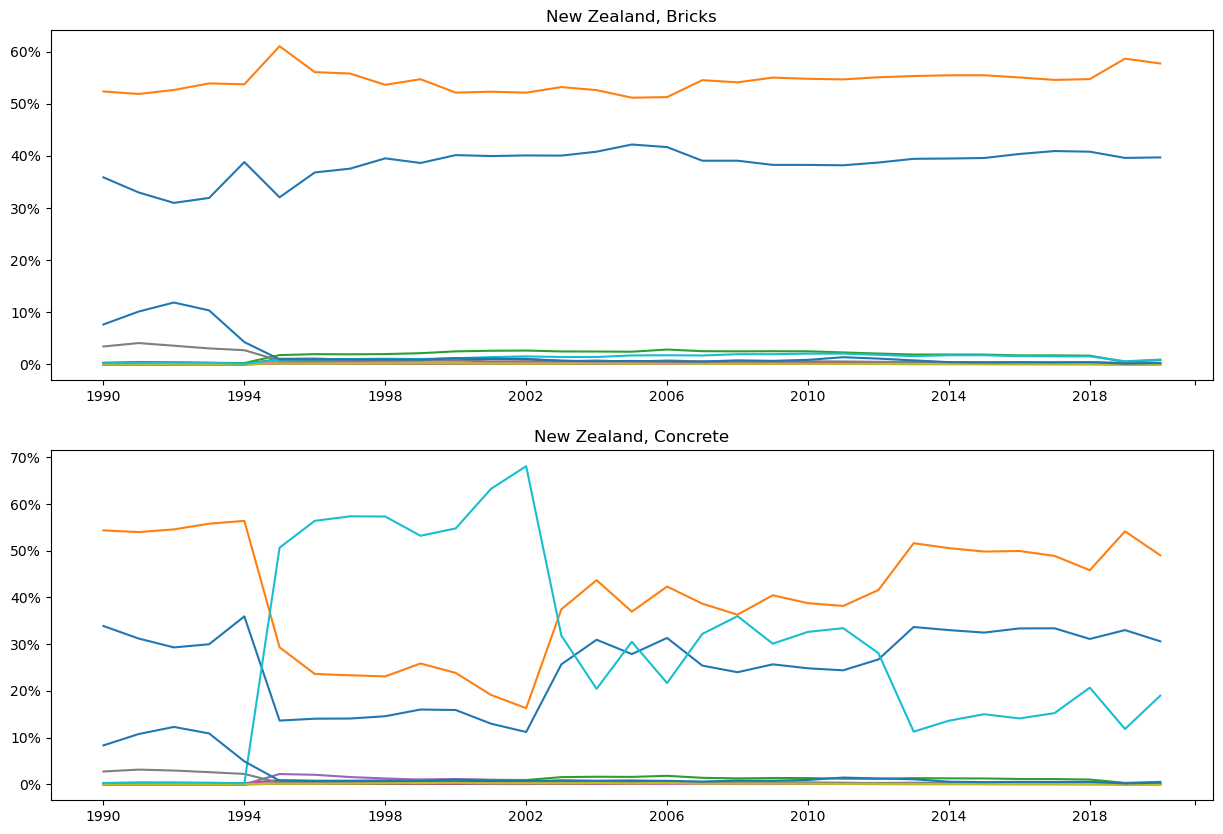

In [187]:
import matplotlib.ticker as mtick

# aggregate everything > 5% in "other"
n_plots = len(plot_list)
n_rows = 2
n_cols = math.ceil(n_plots/n_rows)
# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for ax, key in zip(axes, plot_list):
    ax.plot(plot_list[key].T)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    #ax.set_xlabel('Category')
    #ax.set_ylabel('Data {}'.format(i + 1))
    ax.set_title(f'{key[0]}, {key[1]}')


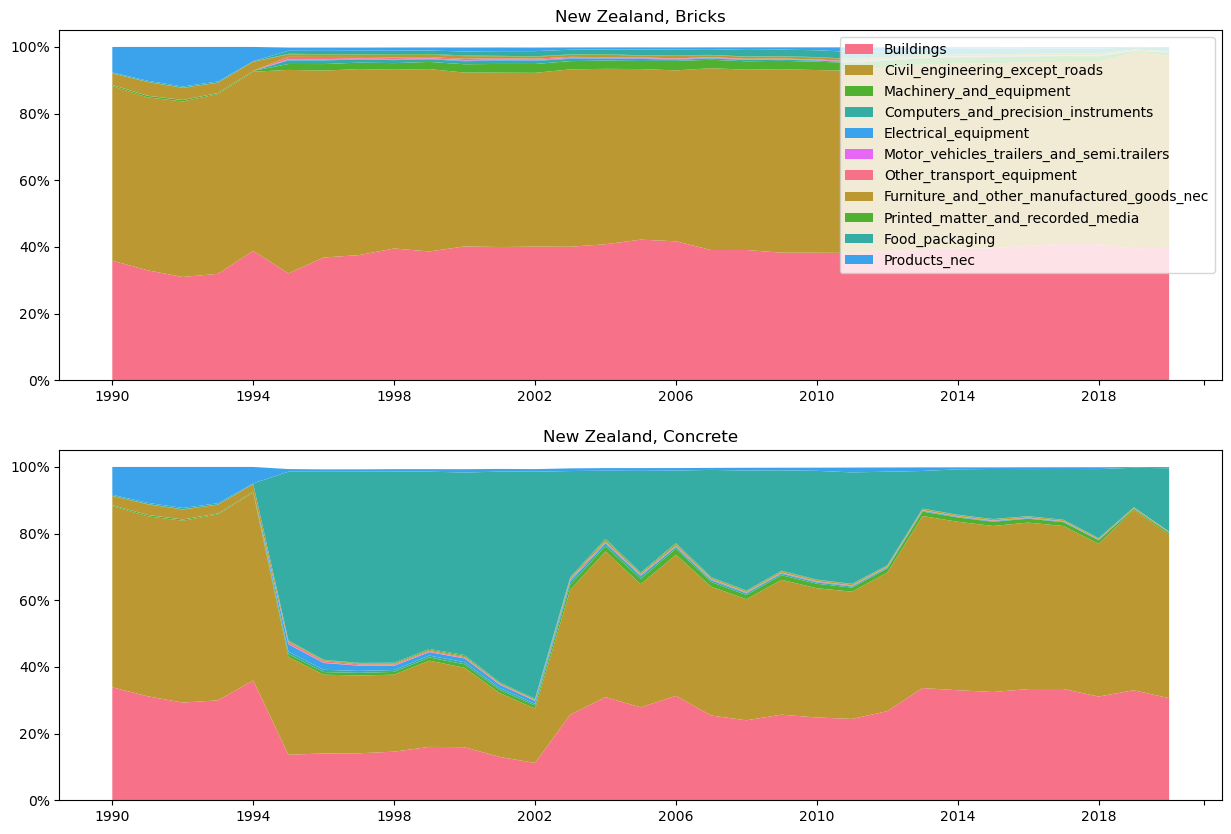

In [239]:
import matplotlib.ticker as mtick

# aggregate everything > 5% in "other"?

n_plots = len(plot_list)
n_rows = 2
n_cols = math.ceil(n_plots/n_rows)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for ax, key in zip(axes, plot_list):
    ax.stackplot(plot_list[key].columns.values, plot_list[key].values, labels=plot_list[key].index)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_title(f'{key[0]}, {key[1]}')
axes[0].legend(loc='upper right')
plt.show()

In [237]:
axes

array([<Axes: title={'center': 'New Zealand, Bricks'}>,
       <Axes: title={'center': 'New Zealand, Concrete'}>], dtype=object)

TypeError: inner() got multiple values for argument 'ax'

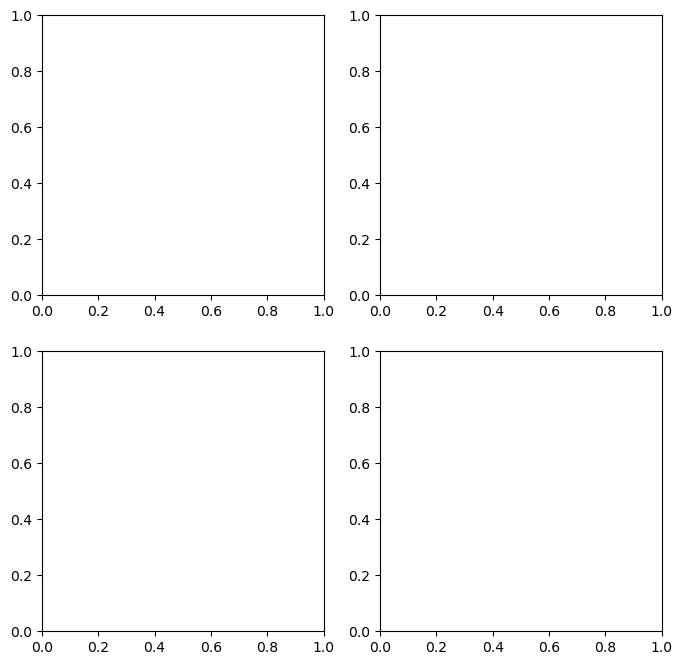

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create example data
x = np.arange(0, 11)
y1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
y2 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y3 = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])

# Create a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Create a stacked area chart on each subplot
plt.stackplot(x, y1, y2, y3, labels=['Series 1', 'Series 2', 'Series 3'], ax=axs[0, 0])
plt.stackplot(x, y3, y2, y1, labels=['Series 3', 'Series 2', 'Series 1'], ax=axs[0, 1])
plt.stackplot(x, y1, y3, y2, labels=['Series 1', 'Series 3', 'Series 2'], ax=axs[1, 0])
plt.stackplot(x, y2, y1, y3, labels=['Series 2', 'Series 1', 'Series 3'], ax=axs[1, 1])

# Add a legend to the last subplot
axs[1, 1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()


In [212]:
plt.show()

In [206]:
plot_list[key].columns.values

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

In [189]:
?ax.stackplot

In [ ]:
# if value already in columns: add up to that column
# if value not already there, rename
# if multiple, aggregate / sum?

In [80]:
all_enduses

,MISO_material,GLORIA_material,Buildings,Civil_engineering_except_roads,Machinery_and_equipment,Computers_and_precision_instruments,Electrical_equipment,Motor_vehicles_trailers_and_semi.trailers,Other_transport_equipment,Furniture_and_other_manufactured_goods_nec,Textiles,Printed_matter_and_recorded_media,Food_packaging,Products_nec,country
0,Concrete,"Cement, lime and plaster products",14.091759,23.344272,0.788621,0.585482,1.568394,0.096311,0.306157,0.263484,0.718305,0.172664,57.347542,0.717009,New Zealand
1,Bricks,Other non-metallic mineral products n.e.c.,37.552014,55.808473,1.932281,0.918958,0.168100,0.147755,0.478827,0.664282,0.188396,0.164054,1.023425,0.953433,New Zealand
2,Container,Other non-metallic mineral products n.e.c.,37.552014,55.808473,1.932281,0.918958,0.168100,0.147755,0.478827,0.664282,0.188396,0.164054,1.023425,0.953433,New Zealand
3,Flat,Other non-metallic mineral products n.e.c.,37.552014,55.808473,1.932281,0.918958,0.168100,0.147755,0.478827,0.664282,0.188396,0.164054,1.023425,0.953433,New Zealand
4,IronSteel,Basic iron and steel,11.287009,17.076661,34.701894,1.985010,6.949625,2.479149,6.598667,5.618581,1.165045,0.953489,9.111869,2.072999,New Zealand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,Tin,Basic tin,10.154818,10.141434,27.067172,0.349213,4.099616,6.913809,0.600443,36.973773,0.279502,0.148428,1.974455,1.297338,Brunei
13,Asphalt,Other non-metallic mineral products n.e.c.,22.063428,21.997343,5.417365,0.015162,0.414603,2.899776,0.065708,27.700802,1.185146,0.446889,6.703815,11.089961,Brunei
14,Plastics,Plastic products,23.694039,23.459138,4.914913,0.105492,0.778003,2.434960,0.187042,16.549775,1.765877,0.511672,9.705490,15.893600,Brunei
15,Wood,Sawmill products,18.887071,18.755463,4.529308,0.025987,0.426170,2.385596,0.061155,30.692426,0.735326,3.678351,15.734399,4.088748,Brunei


In [164]:
len(correspondence_exio_to_gloria.keys())

17